In [2]:
import sqlalchemy as sal
from sqlalchemy import create_engine
import pyodbc
from numpy import random as nr
from pandastable import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

username = 'johnk'
pw = '89cr*(CR'
#db = 'SP_ManuLine'
db = 'dev'
port = 1433
server = '192.168.14.119'

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+db+';UID='+username+';PWD='+ pw)
cursor = cnxn.cursor()

cnxn.autocommit = True

In [27]:
cellname = "GraphTitle" #'A1910170005_cycling' #'A1910170004_Cycling'
#query = "Select * from dev.dev.PresidentialRating"
query = "select month(Startdate) mn, year(startdate) yr, avg(approving) approving, avg(disapproving) disapproving from [dev].[PresidentialRating] where year(startdate) between '2008' and '2016' group by month(Startdate), year(startdate)order by month(Startdate), year(startdate)"

df = pd.read_sql_query(query, cnxn)

df.head(3)

mn    yr  approving  disapproving
0   1  2008         33            61
1   1  2009         55            30
2   1  2010         49            44

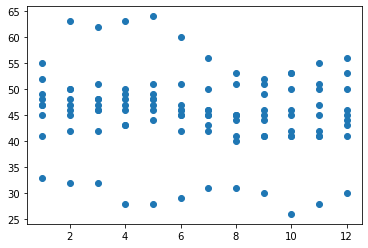

In [28]:
x = df['mn']
y = df['approving']
#colors = df['cellname']
#colors = colors.unique()
#print(colors)
plt.scatter(x, y)#, title=cellname, color="cellname")
#plt.scatter(x,y)
#plt.line(x, y)#, title=cellname, color="cellname")

#fig = px.line(df, x=x, y=y, title="Approving")

plt.show()
#fig.show()

In [30]:
x = df['StartDate']
y = df['Disapproving']
#colors = df['cellname']
#colors = colors.unique()
#print(colors)
#plt.scatter(x, y)#, title=cellname, color="cellname")
#plt.line(x, y)#, title=cellname, color="cellname")

fig = px.line(df, x=x, y=y, title="Disapproving")

#plt.show()
fig.show()

KeyError: 'StartDate'